In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
n=16
gamma=lambda x:1/x
betta = lambda x,y: 1/(1+x*y*y)

x = np.arange(n)

fig = plt.figure(figsize=(12,7))
plt.plot(betta(gamma(25),np.arange(25)))
#plt.plot(betta(gamma(100),np.arange(100)))
plt.xlim((0,25))
plt.ylim((0,1))
plt.grid()
plt.show()

NameError: name 'np' is not defined

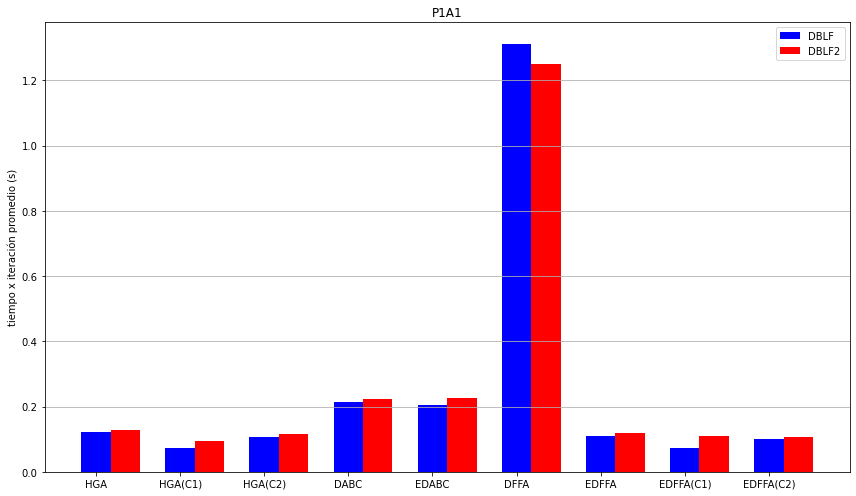

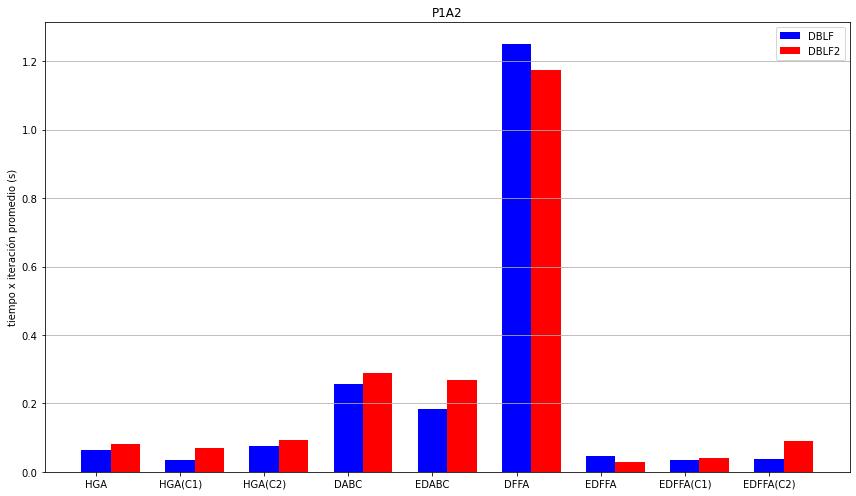

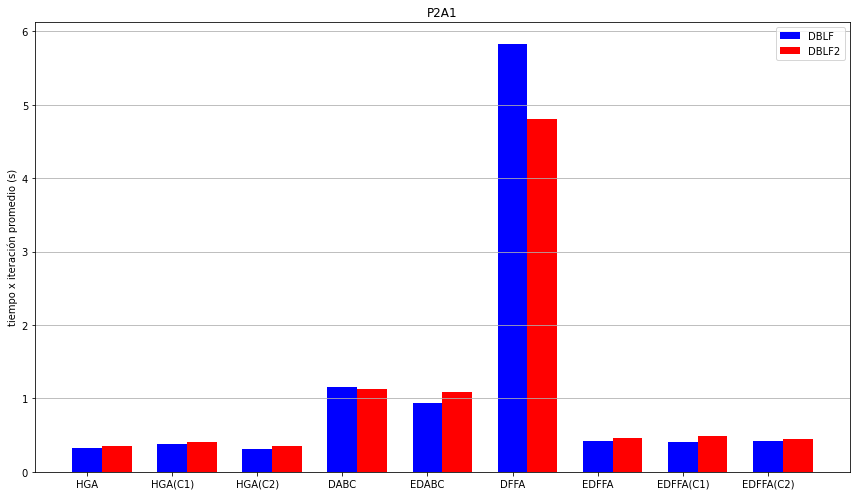

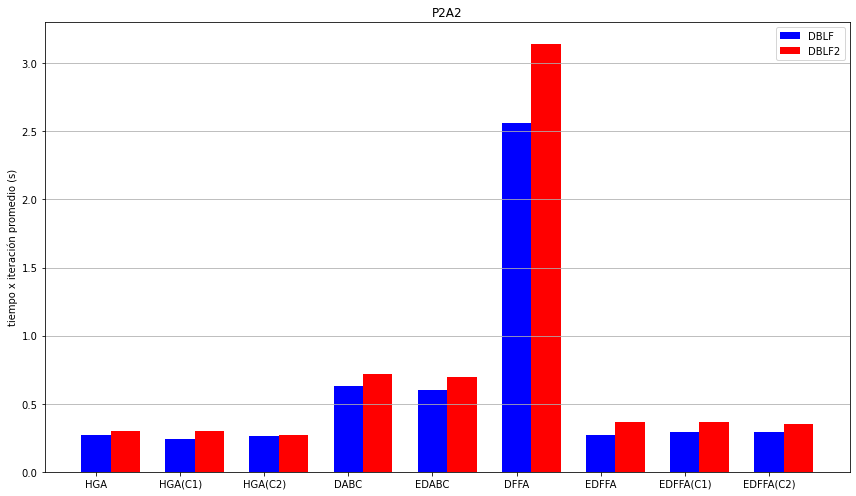

In [6]:
np.set_printoptions(suppress=True)

def getData(name:str):
    problems = [1,2]
    alg = [1,2]
    lst1=[]
    lst2=[]
    for p in problems:
        for a in alg:
            path="Results/P"+str(p)+"A"+str(a)+"/"
            data = np.array(pd.read_csv(path+name+".csv",sep=" ",header=None))
            h1 = data[:20]
            h2 = data[20:]
            mean1 = np.mean(h1,axis=0)  
            mean2=np.mean(h2,axis=0)
            lst1.append(mean1)
            lst2.append(mean2)
    return (lst1,lst2)
def CreateDataMean(names:list[str]):
    g1=[]
    g2=[]
    for nm in names:
        lst1,lst2 = getData(nm)
        g1.append(lst1)
        g2.append(lst2)
    return (g1,g2)

def GetParam(ix:int,names:list[str]):
    lst1 = []
    lst2=[]
    g1,g2 =CreateDataMean(names)
    for i in np.arange(len(g1[0])):
        aux = []
        aux2=[]
        for j in np.arange(len(g1)):
            #aux.append(g1[j][i][ix])
            #aux2.append(g2[j][i][ix])
            aux.append(g1[j][i][ix]/g1[j][i][ix-1])
            aux2.append(g2[j][i][ix]/g2[j][i][ix-1])
            #aux.append(((1-g1[j][i][ix])/g1[j][i][ix])*100)
            #aux2.append(((1-g2[j][i][ix])/g2[j][i][ix])*100)
        lst1.append(aux)
        lst2.append(aux2)
    return lst1,lst2
def PlotBar(algs:list,algs2:list,names:list[str],title:str,yname:str,foldernm:str):
    X=np.arange(len(names))
    Xp = [i + 0.35 for i in range(len(names))]
    fig, ax = plt.subplots(figsize=(12, 7))
    #ax:plt.Axes = fig.add_subplot(111)
    ax.bar(X+0, algs,color='b',width=0.35,label="DBLF")
    ax.bar(X+0.35, algs2,color='r',width=0.35,label="DBLF2")
    ax.set_title(title)
    ax.set_ylabel(yname)
    ax.legend()
    plt.xticks(X,names)
    ax.grid(b=True,axis="y")
    fig.savefig("Images/"+foldernm+"/"+title+'.jpeg')
    fig.tight_layout()

names = ['HGA', 'HGA(C1)','HGA(C2)', 'DABC', 'EDABC', 'DFFA','EDFFA', 'EDFFA(C1)', 'EDFFA(C2)']
algsNm=["P1A1","P1A2","P2A1","P2A2"]
algs,algs2 = GetParam(3,["HAG","c1HAG","c2HAG","DABC","EDABC","DFFA","EDFFA","c1EDFFA","c2EDFFA"])

for i in np.arange(len(algs)):
    PlotBar(algs[i],algs2[i],names,algsNm[i],"tiempo x iteración promedio (s)","tiempoiter")